https://github.com/ZaynMak/zaynmak.github.io/tree/main/posts/Gradient-Descent

In [1]:
from logistic_regression import LogisticRegression
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np
np.seterr(all='ignore') 

np.random.seed(1234)

# make the data
p_features = 3
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

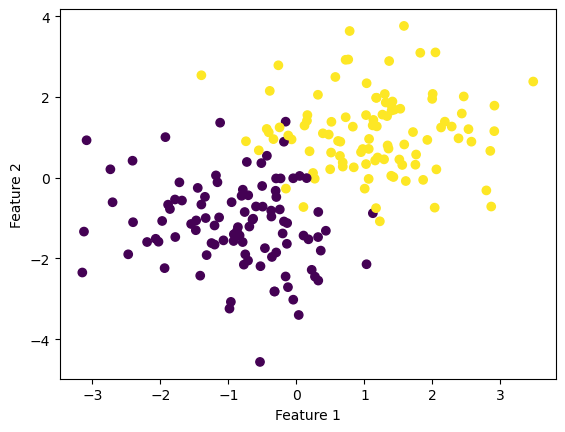

In [2]:
LR = LogisticRegression()
LR.fit_stochastic(X, y, 0.01, 10, 1000)

# inspect the fitted value of w
LR.w 

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

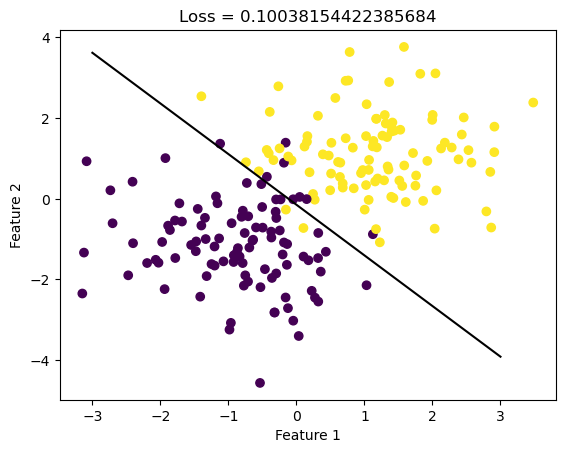

In [3]:
X_ = np.append(X, np.ones((X.shape[0], 1)), 1)
# calculate the loss
loss = LR.empirical_risk(X_, y)

# plot the decision boundary
fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

f1 = np.linspace(-3, 3, 101)

# we plot the data with the decision boundary
p = plt.plot(f1, (LR.w[2] - f1*LR.w[0])/LR.w[1], color = "black")
title = plt.gca().set_title(f"Loss = {loss}")

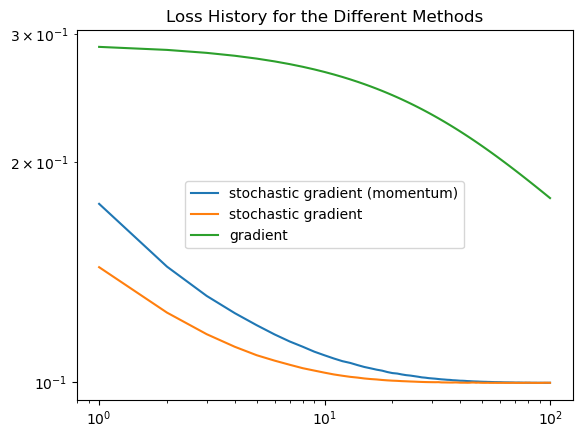

In [4]:
# we find the loss history for the stochastic gradient descent with momentum
LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  max_epochs = 100, 
                  momentum = True, 
                  alpha = .05,
                  batch_size = 10) 

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient (momentum)")

# we find the loss history for the stochastic gradient descent without momentum
LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  max_epochs = 100, 
                  batch_size = 10, 
                  alpha = .5)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient")

# we find the loss history for the gradient descent
LR = LogisticRegression()
LR.fit(X, y,
       alpha = .05,
       max_epochs = 100)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "gradient")

# we set it in the log space
plt.loglog()

# we set the labels
legend = plt.legend()

title = plt.gca().set_title(f"Loss History for the Different Methods")

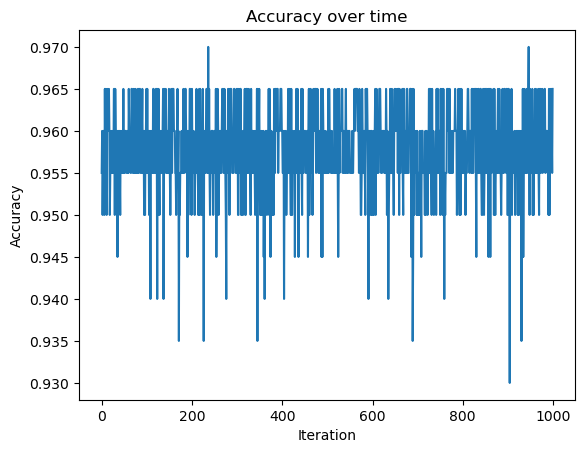

In [5]:
# Experiment 1
LR = LogisticRegression()
LR.fit_stochastic(X, y, 5, 10, 1000)
fig = plt.plot(LR.score_history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")
title = plt.title("Accuracy over time")
# as we can see, the accuracy does not converge to 1, but rather oscillates around 0.96

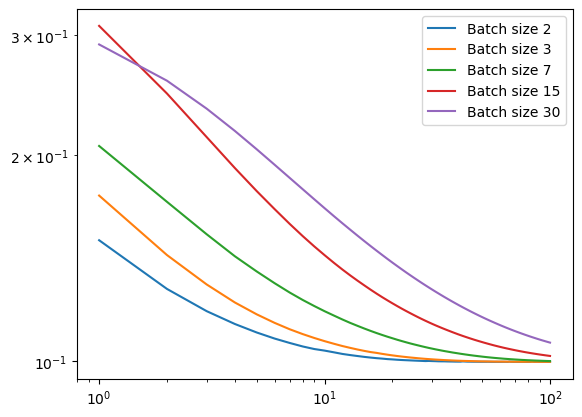

In [6]:
# Experiment 2
# We will now try to change the batch size to compare our loss history
LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  max_epochs = 100, 
                  batch_size = 2, 
                  alpha = .1)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "Batch size 2")

LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  max_epochs = 100, 
                  batch_size = 3, 
                  alpha = .1)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "Batch size 3")

LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  max_epochs = 100, 
                  batch_size = 7, 
                  alpha = .1)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "Batch size 7")

LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  max_epochs = 100, 
                  batch_size = 15, 
                  alpha = .1)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "Batch size 15")

LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  max_epochs = 100, 
                  batch_size = 30, 
                  alpha = .1)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "Batch size 30")

plt.loglog()

legend = plt.legend() 
# we see that the fastest decrease in loss is for batch size 2, but it also starts at the lowest starting loss value

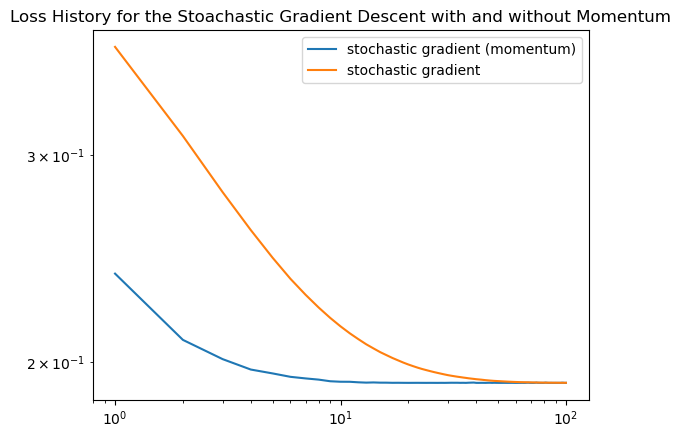

In [7]:
# Experiment 3

# we create data with 10 features
p_features = 10
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

# we find the loss history for the stochastic gradient descent with momentum
LR = LogisticRegression()
LR.fit_stochastic(X, y,
                    max_epochs = 100,
                    momentum = True,
                    alpha = .05,
                    batch_size = 10)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient (momentum)")

# we find the loss history for the stochastic gradient descent without momentum
LR = LogisticRegression()
LR.fit_stochastic(X, y,
                    max_epochs = 100,
                    momentum = False,
                    alpha = .05,
                    batch_size = 10)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient")

# we plot it in the log space
plt.loglog()

# we set the labels
legend = plt.legend()

# set the title
title = plt.gca().set_title(f"Loss History for the Stoachastic Gradient Descent with and without Momentum")
